In [ ]:
라이브러리 임포트

In [2]:
import numpy as np
import matplotlib.pyplot as pylab
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from skimage.io import imread
from sklearn.utils import shuffle
from skimage import img_as_float

In [ ]:
색상 양자화로 영상 분할을 위한 k-means 클러스터링

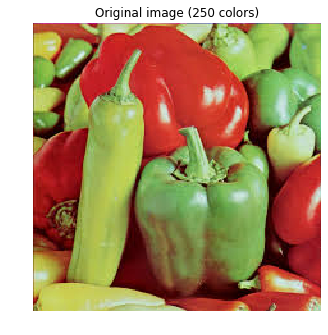

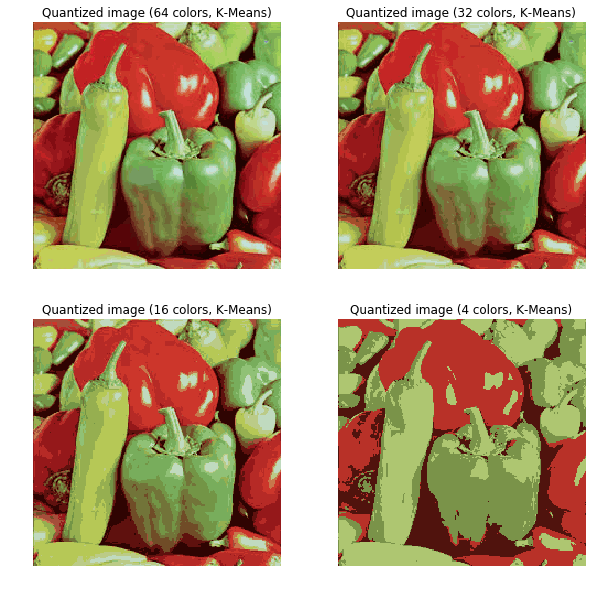

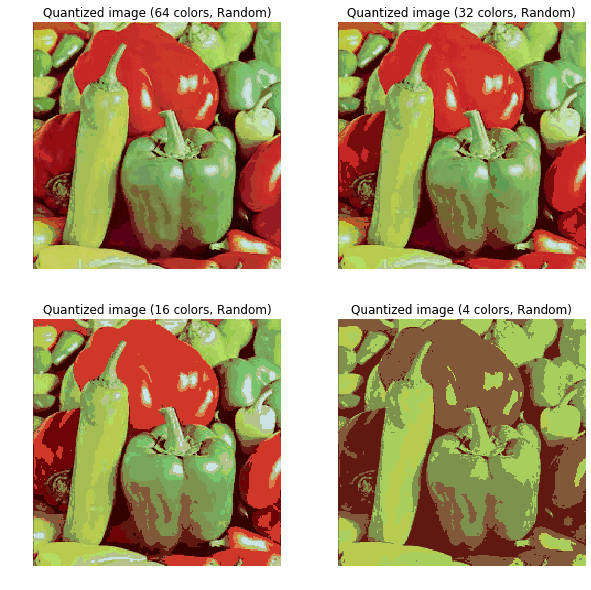

In [3]:
# 8비트 정수 행렬을 float64형으로 변환
# pylab.imshow는 [0-1] 범위 실수 행렬만 사용함
pepper = imread("../images/pepper.jpg")
pepper = img_as_float(pepper)

# 3채널 영상을 2차원(세로×가로, 채널) 배열로 변환
h, w, d = original_shape = tuple(pepper.shape)
assert d == 3 # 3차원 데이터 확인
image_array = np.reshape(pepper, (w * h, d)) # 배열 형태 변환 (50625, 3)

def recreate_image(codebook, labels, w, h):
    """코드북과 레이블로부터 영상 재생성"""
    d = codebook.shape[1]
    labels = labels.reshape(h, w)
    image = [[codebook[labels[i][j]] for j in range(w)] for i in range(h)]

    return image

# 원본 영상 옆에 모든 결과 표시
pylab.figure(1), pylab.clf()
ax = pylab.axes([0, 0, 1, 1]), pylab.axis('off')
pylab.title('Original image (%d colors)' %(len(np.unique(pepper))))
pylab.imshow(pepper)

pylab.figure(2, figsize=(10,10)), pylab.clf()
i = 1
for k in [64, 32, 16, 4]:
    # 영상에서 랜덤하게 1000화소를 가져와 k-means 수행
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=k, random_state=0).fit(image_array_sample)
    labels = kmeans.predict(image_array) # 전체 영상에 대한 색상 인덱스 예측
    pylab.subplot(2,2,i), pylab.axis('off')
    pylab.title('Quantized image (' + str(k) + ' colors, K-Means)')
    pylab.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
    i += 1
pylab.show()
    
pylab.figure(3, figsize=(10,10)), pylab.clf()
i = 1
for k in [64, 32, 16, 4]:
    codebook_random = shuffle(image_array, random_state=0)[:k + 1]
    #전체 영상에 대한 색상 인덱스 예측(random)
    labels_random = pairwise_distances_argmin(codebook_random,\
                                              image_array, axis=0)
    pylab.subplot(2,2,i), pylab.axis('off')
    pylab.title('Quantized image (' + str(k) + ' colors, Random)')
    pylab.imshow(recreate_image(codebook_random, labels_random, w, h))
    i += 1
pylab.show()

In [ ]:
k-means 클러스터링

C:\Users\bae22\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  
C:\Users\bae22\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


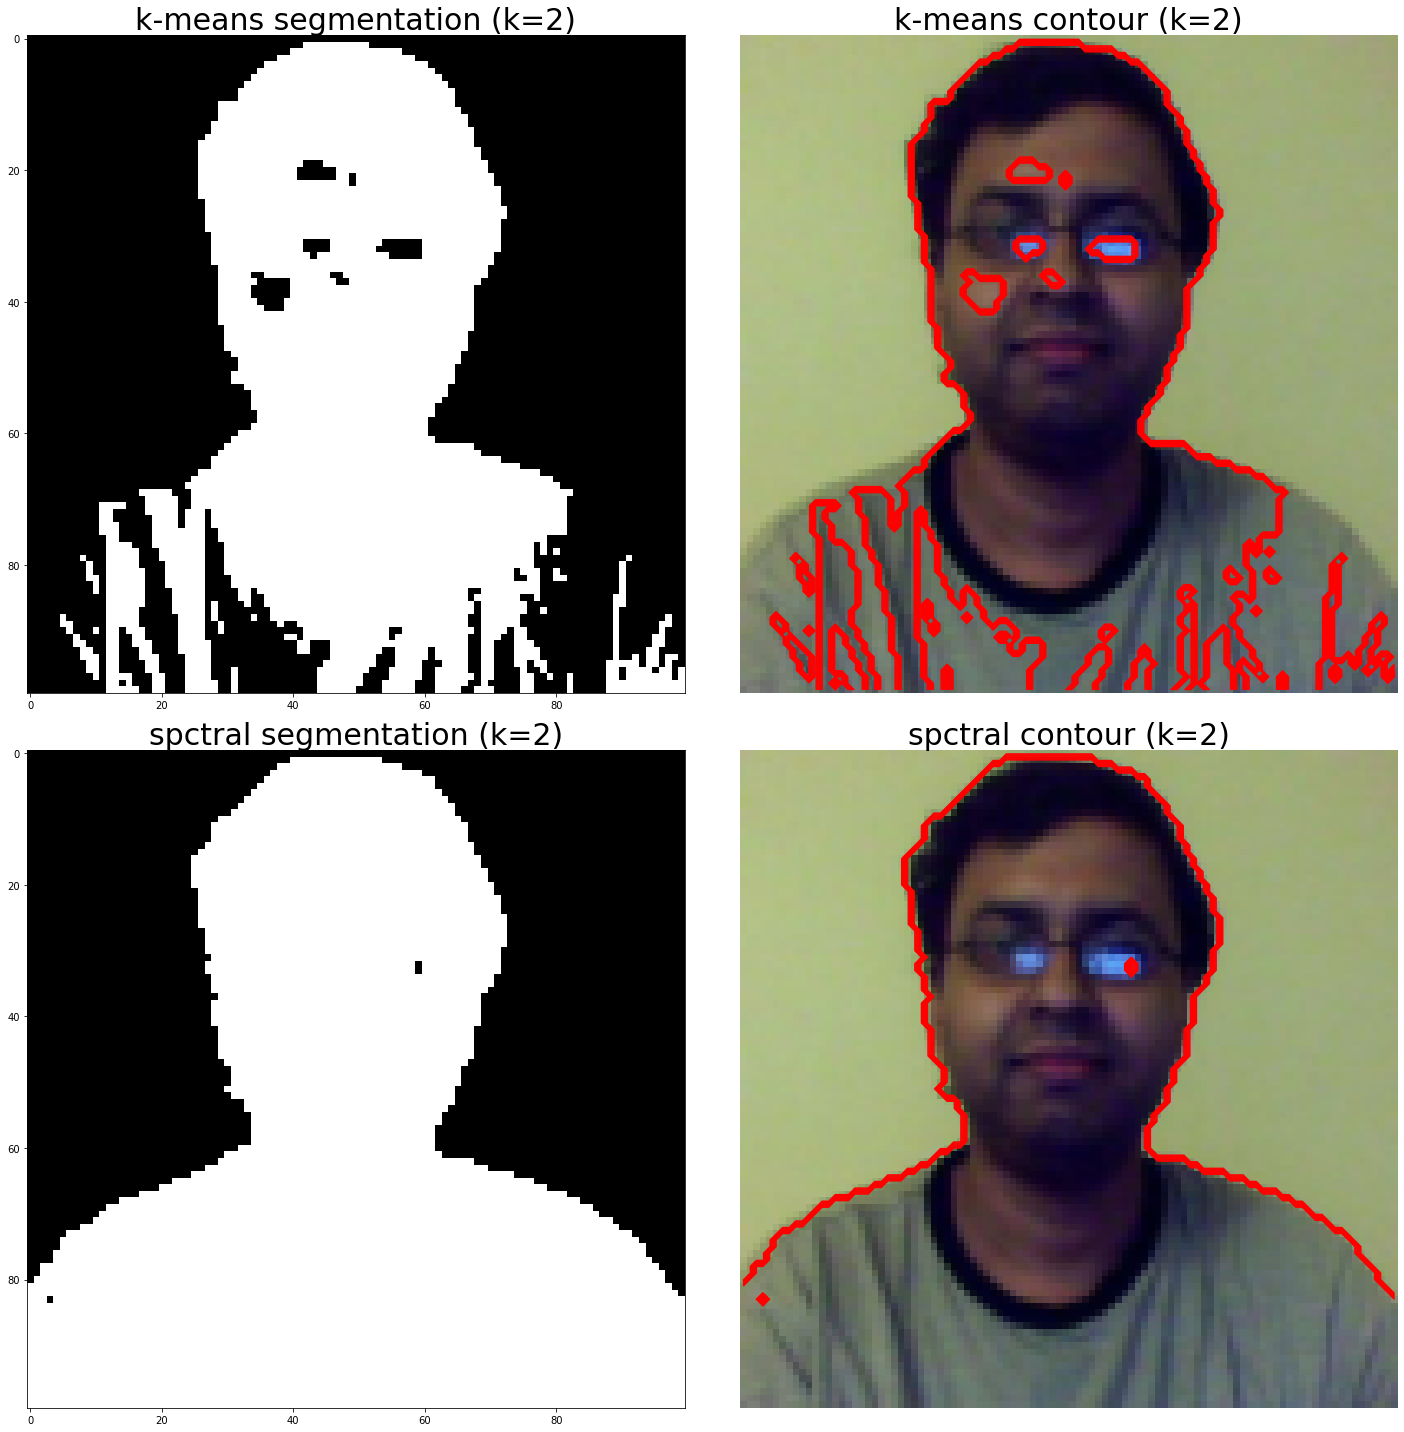

(None, None)

In [5]:
from sklearn import cluster
from skimage.io import imread
from scipy.misc import imresize
from skimage.color import rgb2gray

im = imresize(imread('../images/me14.jpg'), (100,100,3))
img = rgb2gray(im)
k = 2 # 이진 분할
X = np.reshape(im, (-1, im.shape[-1]))

two_means = cluster.MiniBatchKMeans(n_clusters=k, random_state=10)
two_means.fit(X)
y_pred1 = two_means.predict(X)
spectral = cluster.SpectralClustering(n_clusters=k, eigen_solver='arpack', \
                                      affinity="nearest_neighbors", n_neighbors=100, random_state=10)
spectral.fit(X)
y_pred2 = spectral.labels_.astype(np.int)
labels = [ np.reshape(y_pred1, im.shape[:2]), # k-means 클러스터링
np.reshape(y_pred2, im.shape[:2])] # 스펙트럼 클러스터링
titles = ["k-means" , "spctral"]
pylab.figure(figsize=(20,20))

for i, label in enumerate(labels):
    pylab.subplot(2, 2, i*2+1), pylab.imshow(label, cmap='gray')
    pylab.title( titles[i] +' segmentation (k=2)', size=30)
    pylab.subplot(2, 2, i*2+2), pylab.imshow(im)
    pylab.contour(label == 0, contours=1, colors='red')
    pylab.title(titles[i]+' contour (k=2)', size=30), pylab.axis('off')
    
pylab.tight_layout(), pylab.show()